# Spatial Analysis in Geology using R

## by Pedro Nogueira

<span style="color:red;"> 
    <h1> 18. Putting  it all to work: Part II rasters </h1>
</span>

In [1]:
#18-00
# Settings

# Print the R version information
print(R.version)

# Verify thw working directory
wd_base = getwd()
print(wd_base)

               _                           
platform       aarch64-apple-darwin20      
arch           aarch64                     
os             darwin20                    
system         aarch64, darwin20           
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               
[1] "/Users/pnogasmacmini/Documents/Jupyter Notebooks/SAGR/Part II"


<span style="color:green;"> 
    <h2> 18.1. Setting up the environment </h2>
</span>

In [2]:
#18-01
# Load the libraries
library(terra)
library(sf)
library(ggplot2)
library(rasterVis)

# Define the working folder
setwd("/Users/pnogasmacmini/Documents/Jupyter Notebooks/SAGR/Sentinel/GRANULE/L2A_T29SQB_A042176_20230720T110926//IMG_DATA//R20m")

terra 1.7.55

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

Loading required package: lattice



In [3]:
#18-02
# Define the lists of files
files_20 = list.files(pattern = "20m.jp2", full.names = TRUE, recursive = T)

# Work with the 20m complete bandset
pattern_bands = "_B\\d\\w_20m.jp2"
files_bands = list.files(pattern = pattern_bands, full.names = TRUE, recursive = T)

# View the results
files_20

# View the results
files_bands

[1] "./T29SQB_20230720T110621_AOT_20m.jp2"
 [2] "./T29SQB_20230720T110621_B01_20m.jp2"
 [3] "./T29SQB_20230720T110621_B02_20m.jp2"
 [4] "./T29SQB_20230720T110621_B03_20m.jp2"
 [5] "./T29SQB_20230720T110621_B04_20m.jp2"
 [6] "./T29SQB_20230720T110621_B05_20m.jp2"
 [7] "./T29SQB_20230720T110621_B06_20m.jp2"
 [8] "./T29SQB_20230720T110621_B07_20m.jp2"
 [9] "./T29SQB_20230720T110621_B11_20m.jp2"
[10] "./T29SQB_20230720T110621_B12_20m.jp2"
[11] "./T29SQB_20230720T110621_B8A_20m.jp2"
[12] "./T29SQB_20230720T110621_SCL_20m.jp2"
[13] "./T29SQB_20230720T110621_TCI_20m.jp2"
[14] "./T29SQB_20230720T110621_WVP_20m.jp2"

[1] "./T29SQB_20230720T110621_B01_20m.jp2"
 [2] "./T29SQB_20230720T110621_B02_20m.jp2"
 [3] "./T29SQB_20230720T110621_B03_20m.jp2"
 [4] "./T29SQB_20230720T110621_B04_20m.jp2"
 [5] "./T29SQB_20230720T110621_B05_20m.jp2"
 [6] "./T29SQB_20230720T110621_B06_20m.jp2"
 [7] "./T29SQB_20230720T110621_B07_20m.jp2"
 [8] "./T29SQB_20230720T110621_B11_20m.jp2"
 [9] "./T29SQB_20230720T110621_B12_20m.jp2"
[10] "./T29SQB_20230720T110621_B8A_20m.jp2"

In [4]:
#18-03
# Create a SpatRaster of 20m images
S2_20m = rast(files_bands)

# Convert to WGS84
S2_20m = project(S2_20m, "EPSG:4326")

# Define extent equal to Chapter 17 Rio Tinto croped data
RT_extent = ext(-6.70, -6.30, 37.55, 37.85)

# Crop the image
RT_20m = crop(S2_20m, RT_extent)

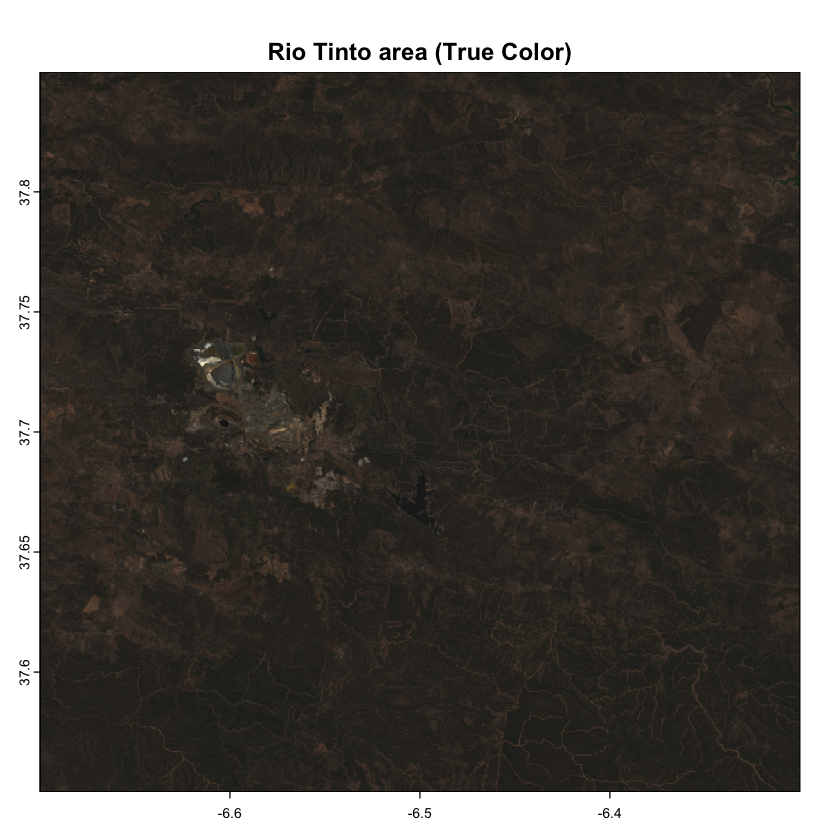

In [9]:
#18-04
# Rename the SpatRaster bands
names(RT_20m) = c('CIR', 'blue', 'green', 'red', 'RE1', 'RE2', 'RE3', 'SWIR1', 'SWIR2', 'NIR')

# Plot the True Colour band composition
par(mfrow=c(1,1))
plotRGB(RT_20m, r="red", g="green", b="blue", 
        axes=TRUE, mar=c(2,1,3,1), main ="Rio Tinto area (True Color)")

<span style="color:green;"> 
    <h2> 18.2. Combining bands </h2>
</span>

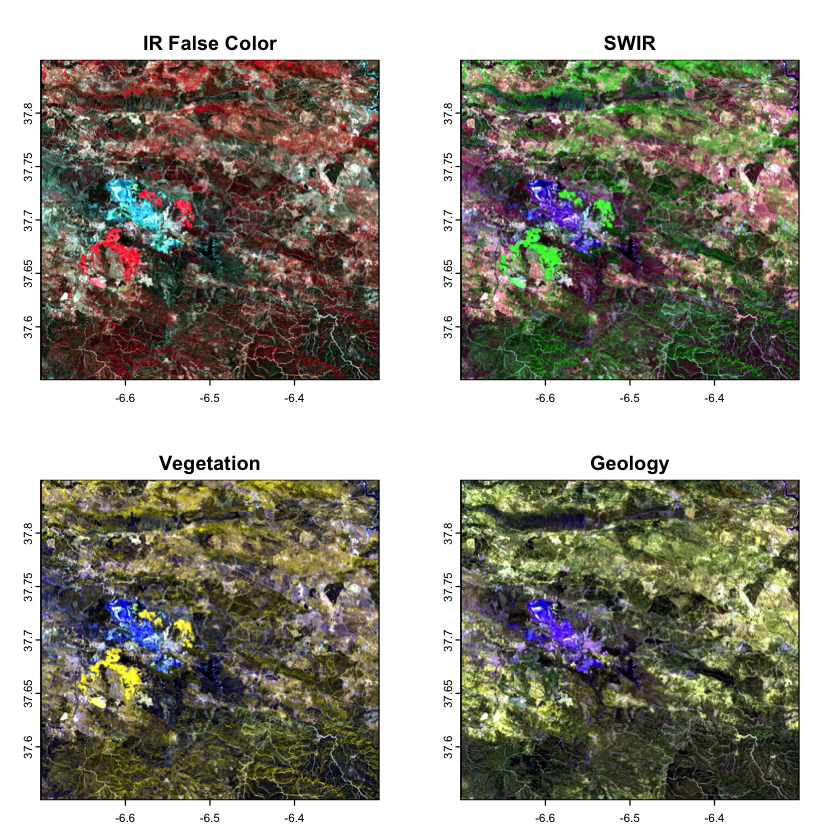

In [10]:
#18-05
# Plot examples of combinations of bands
par(mfrow=c(2,2))
plotRGB(RT_20m, r="NIR", g="red", b="green", 
        axes=TRUE, mar=c(2,1,3,1), stretch="lin",
        main ="IR False Color") # 8 4 3

plotRGB(RT_20m, r="SWIR2", g="NIR", b="red",
    axes=TRUE, mar=c(2,1,3,1),stretch="lin",
    main ="SWIR") # 12 8 4

plotRGB(RT_20m, r="NIR", g="RE3", b="blue",
    axes=TRUE, mar=c(2,1,3,1),stretch="lin",
    main ="Vegetation") # 8 5 2(4)

plotRGB(RT_20m, r="SWIR2", g="SWIR1", b="blue",
    axes=TRUE, mar=c(2,1,3,1),stretch="lin",
    main ="Geology") # 12 11 2

<span style="color:green;"> 
    <h2> 18.3. Calculating indices </h2>
</span>

In [11]:
#18-06
# NDVI (Normalised Difference Vegetation Index)
NDVI = (RT_20m$NIR - RT_20m$red) / (RT_20m$NIR + RT_20m$red) # (B05 - B04) / (B05 + B04)

# NDWI (Normalised Difference Water Index)
NDWI = (RT_20m$green - RT_20m$NIR) / (RT_20m$green + RT_20m$NIR) # (B03 - B08) / (B03 + B08)

# Filter the NDWI to a threshold
WATER = NDWI > 0.05 # Water bodies definition
WATER[WATER == 0 ] = NA

# MSI (Moisture Soil Index)
MSI = RT_20m$SWIR2 / RT_20m$red # B11 / B08

# BSI (Bare Soil Index)
BSI = ( (RT_20m$SWIR1 + RT_20m$red) - (RT_20m$NIR + RT_20m$blue)) / ((RT_20m$SWIR1 + RT_20m$red) + (RT_20m$NIR + RT_20m$blue)) # BSI = ((B11 + B04) - (B08 + B02)) / ((B11 + B04) + (B08 + B02))

# CVI - Chlorophyll Vegetation Index
CVI = RT_20m$NIR * (RT_20m$red / (RT_20m$red^2)) # CVI

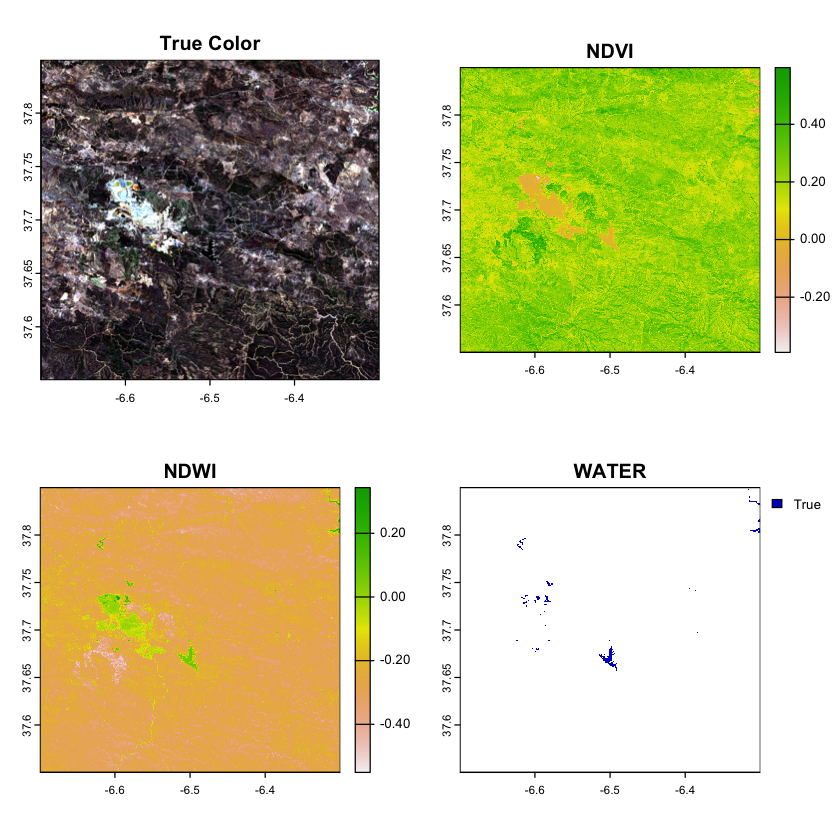

In [12]:
#18-07
# Create a plot
par(mfrow = c(2,2))
plotRGB(RT_20m, r="red", g="green", b="blue",
    axes=TRUE, mar=c(2,1,3,1), stretch ="lin",
    main ="True Color")

plot(NDVI, main="NDVI")
plot(NDWI, main="NDWI")
plot(WATER, main="WATER", col="blue3")

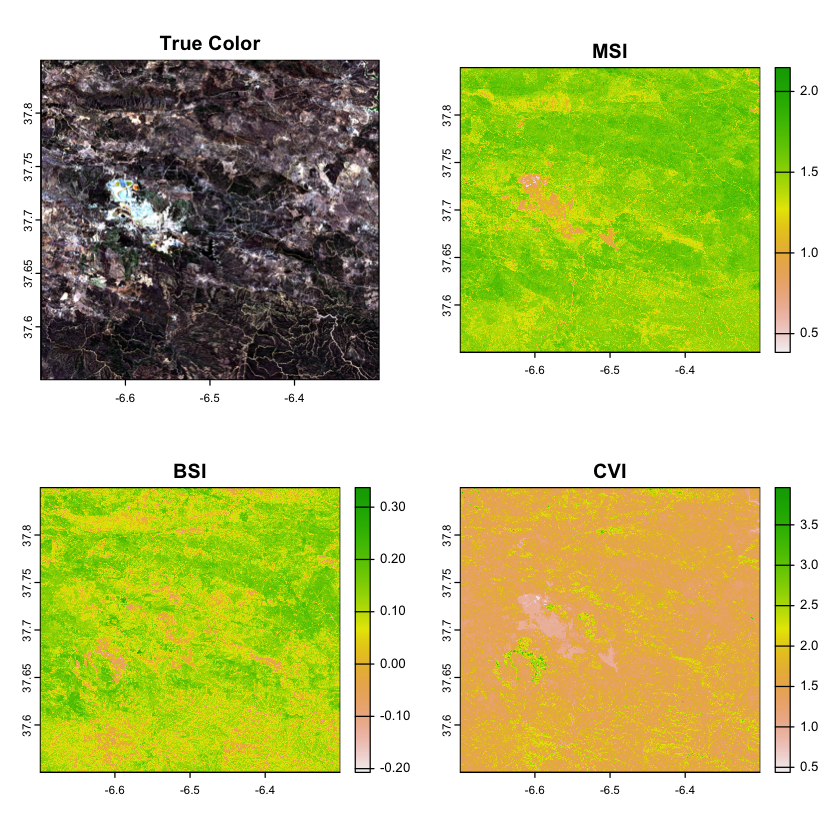

In [13]:
#18-08
# More plots
par(mfrow = c(2,2))
plotRGB(RT_20m, r="red", g="green", b="blue",
    axes=TRUE, mar=c(2,1,3,1), stretch ="lin",
    main ="True Color") # 4 3 2

plot(MSI, main="MSI")
plot(BSI, main="BSI")
plot(CVI, main="CVI")

<span style="color:green;"> 
    <h2> 18.4. A thematic map </h2>
</span>

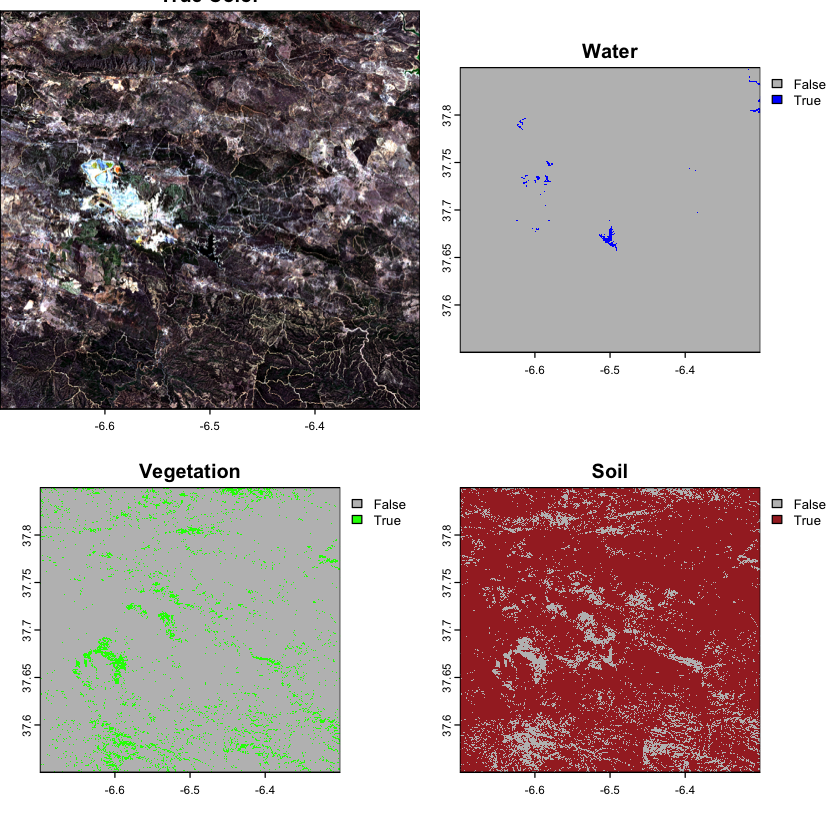

In [14]:
#18-09
# THRESHOLDS
par(mfrow=c(2,2))

# The base image
plotRGB(RT_20m, r="red", g="green", b="blue",
    axes=TRUE, stretch ="lin", 
        main ="True Color") # 4 3 2

# Water
water = NDWI > 0.05
plot(water, col=c("grey","blue"), main="Water")

# Vegetation
vegetation = CVI > 2.0
plot(vegetation, col=c("grey","green"), main="Vegetation")

# Soil
soil = BSI > .05
plot(soil, col=c("grey","brown"), main="Soil")

In [15]:
#18-10
# Prepare the data for creating a combined map
water = water * 1 # yes I know :)
vegetation = vegetation * 2
soil = soil * 3

# Merge the rasters into a single raster
thematic = mosaic(water, vegetation, soil, fun = "max")

Warning message:
“[hist] a sample of34% of the cells was used”


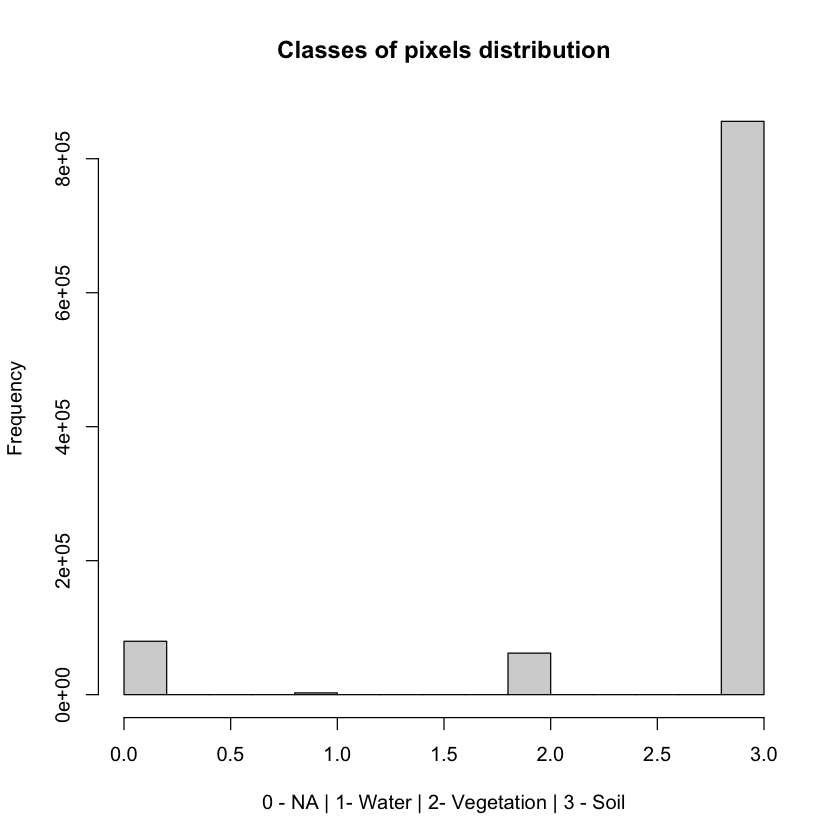

In [16]:
#18-11
# View the distribution
par(mfrow=c(1,1))
hist(thematic, main = "Classes of pixels distribution", xlab = "0 - NA | 1- Water | 2- Vegetation | 3 - Soil")

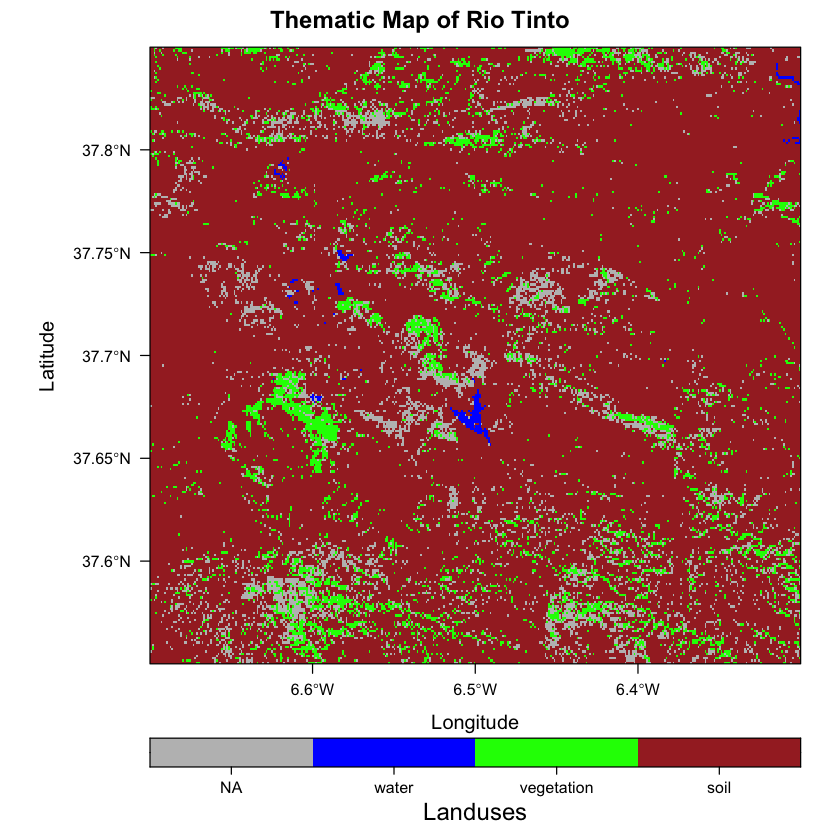

In [17]:
#18-12
# For the legend
cols = c("grey","blue","green","brown")
names(cols) = c("NA", "water", "vegetation", "soil")

# Plot raster
levelplot(thematic, main = "Thematic Map of Rio Tinto",
    margin = list(c(1,0,0,1)),
    col.regions = cols,
    colorkey = list(at = 0:4, space = "bottom",
        labels = list(at=0.5:3.5, labels = names(cols)),
        title = "Landuses",
        title.control = list(side = "bottom")))

<span style="color:green;"> 
    <h2> 18.5. The 'whitebox' package </h2>
</span>

In [18]:
library("whitebox")
cat(wbt_version())

WhiteboxTools v2.3.0 (c) Dr. John Lindsay 2017-2023  WhiteboxTools is an advanced geospatial data analysis platform developed at the University of Guelph's Geomorphometry and Hydrogeomatics Research  Group (GHRG). See www.whiteboxgeo.com for more details.

Loading required package: sp

elevatr v0.99.0 NOTE: Version 0.99.0 of 'elevatr' uses 'sf' and 'terra'.  Use 
of the 'sp', 'raster', and underlying 'rgdal' packages by 'elevatr' is being 
deprecated; however, get_elev_raster continues to return a RasterLayer.  This 
will be dropped in future versions, so please plan accordingly.

Mosaicing & Projecting

Note: Elevation units are in meters.



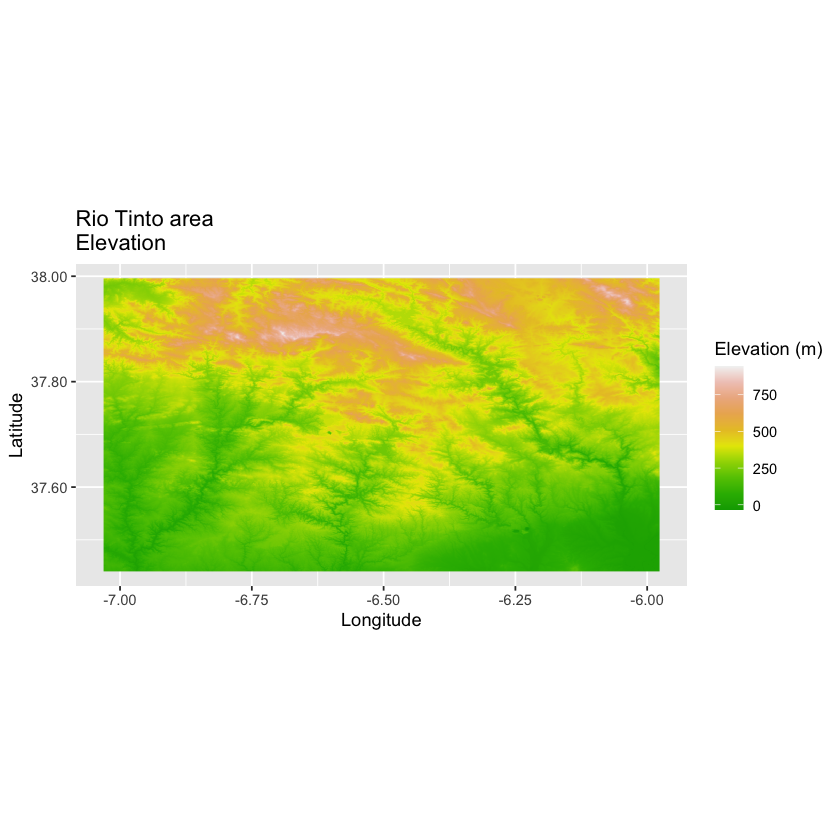

In [19]:
#18-14
# Load the libraries
library(sf)
library(terra)
library(raster)
library(whitebox)
library(elevatr)
library(ggplot2)
library(ggnewscale)

# Retrieve elevation data for a larger region
RT_elev = get_elev_raster(RT_20m, z=10)

# Convert to a SpatialPointsDataFrame
r_elev_pts = rasterToPoints(RT_elev, spatial = TRUE)

# Then to a 'conventional' dataframe
r_elev_df = data.frame(r_elev_pts)
names(r_elev_df) = c("Elevation", "x", "y","optional")

# The colour palette
col_elev = terrain.colors(10)

# The plot
ggplot() +
    geom_raster(data = r_elev_df, aes(x = x, y = y, fill = Elevation)) +
    scale_fill_gradientn(name = "Elevation (m)", colors = col_elev) +
    ggtitle("Rio Tinto area\nElevation") +
    labs(x = "Longitude", y = "Latitude") +
    coord_fixed() +
    scale_x_continuous(labels = scales::number_format(accuracy = 0.01)) + # DECIMAL PLACES in X and Y
    scale_y_continuous(labels = scales::number_format(accuracy = 0.01))

In [21]:
#18-15
setwd("/Users/pnogasmacmini/Documents/Jupyter Notebooks/SAGR/wb/")

# Whitebox initialization
wbt_init()

# Working folder for whitebox
wbt_wd("/Users/pnogasmacmini/Documents/Jupyter Notebooks/SAGR/wb/")

# Save the elevation to the working folder
writeRaster(RT_elev, filename="RT_elev.tif",format="GTiff", overwrite = TRUE)

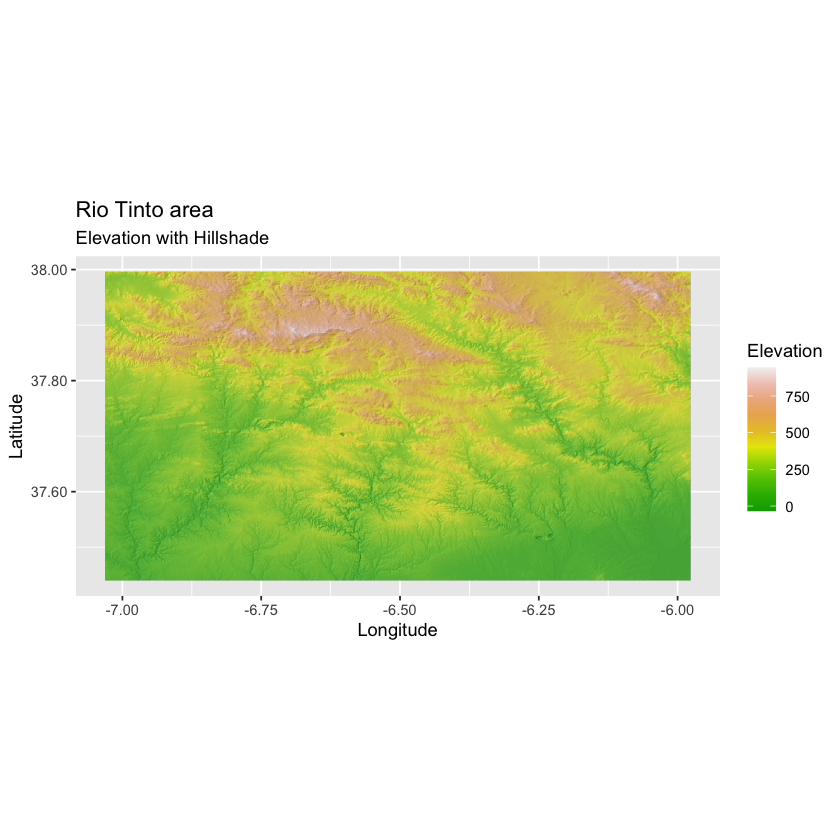

In [22]:
#18-16
# Create the hillshade
wbt_multidirectional_hillshade("RT_elev.tif", "hillshade.tif")

# Read the result
r = raster("hillshade.tif")

# convert to a df for plotting
r_hill_pts = rasterToPoints(r, spatial = TRUE)
r_hill_df = data.frame(r_hill_pts)

# Color scale for the hillshade
col_hill = grey(0:10/10)

# Combined elevation and hillshade
ggplot() +
    geom_raster(data = r_hill_df, # HILLSHADE
        aes(x = x, y = y, fill = hillshade),
        show.legend = FALSE) +
    scale_fill_gradientn(name = "Hillshade", colors = col_hill,) + # GREYS
    new_scale_fill() +
    geom_raster(data = r_elev_df, # ELEVATION
        aes(x = x, y = y, fill = Elevation),
        alpha = 0.7) +
    scale_fill_gradientn(name = "Elevation", colors = col_elev) + # Terrain Colors
    coord_fixed() +
    labs( x = "Longitude", y = "Latitude",title = "Rio Tinto area", subtitle="Elevation with Hillshade") +
    scale_x_continuous(labels = scales::number_format(accuracy = 0.01)) + # DECIMAL PLACES in X
    scale_y_continuous(labels = scales::number_format(accuracy = 0.01))

In [ ]:
#18-17
# Contours
wbt_contours_from_raster(
    input="RT_elev.tif",
    output="contours.shp",
    interval=100,
    smooth=9)

# Read the shapefile
RT_contours = st_read("contours.shp")

# Combined elevation and hillshade
ggplot() +
    geom_raster(data = r_hill_df, # HILLSHADE
        aes(x = x, y = y, fill = hillshade),
        show.legend = FALSE) +
    scale_fill_gradientn(name = "Hillshade", colors = col_hill,) + # GREYS
    new_scale_fill() +
    geom_raster(data = r_elev_df, # ELEVATION
        aes(x = x, y = y, fill = Elevation),
        alpha =.7) +
    scale_fill_gradientn(name = "Elevation", colors = col_elev) + # Terrain Colours
    geom_sf(data=RT_contours, colour="brown")+
    coord_sf() +
    labs( x = "Longitude", y = "Latitude", title = "Rio Tinto area", subtitle="Elevation/Hillshade/Contours") +
    scale_x_continuous(labels = scales::number_format(accuracy = 0.01)) +     # DECIMAL PLACES in X
    scale_y_continuous(labels = scales::number_format(accuracy = 0.01))

In [ ]:
#18-18
# Smooth
wbt_feature_preserving_smoothing(
dem = "RT_elev.tif", output = "smoothed.tif")

# Breach Depressions
wbt_breach_depressions(
dem = "smoothed.tif", output = "breached.tif", fill_pits=TRUE)

# Flow accumulation
wbt_d_inf_flow_accumulation( input = "breached.tif",
output = "flow_accum.tif")

# Extract streams
wbt_extract_streams(flow_accum = "flow_accum.tif",
output = "Streams.tif", threshold = 1)

# Resample
wbt_resample(input="Streams.tif", output="Streams_resampled.tif",
cell_size = 0.00002) # This value is in decimal degrees

# View the result
r = raster("Streams_resampled.tif")
plot(r, main= "Streams", legend=F, col="blue")

In [ ]:
#18-19
# D8 Pointer
wbt_d8_pointer( dem="breached.tif", output = "d8_pointer.tif")

# Strahler Stream Order
wbt_strahler_stream_order( d8_pntr="d8_pointer.tif",
streams="Streams.tif", output="Strahler.tif")

# Resample the result
wbt_resample( input="Strahler.tif", output="Strahler_resampled.tif",
cell_size = 0.00002) # This value must be tested

# Plot the results
r = raster("Strahler_resampled.tif")
plot(r, main= "Strahler classification", breaks=c(1:4), col=c("blue","green","red"))

In [ ]:
#18-20
# Basins
wbt_basins( d8_pntr = "d8_pointer.tif", output = "basin.tif")

# View the results
r = raster("basin.tif")
plot(r, main = "RT Basin and Streams", legend = F)
r1 = raster("Strahler_resampled.tif")
plot(r1, add=T, breaks=c(1:4), col=c("blue","green","red"))

In [ ]:
#18-21
# GEOMORPHS
wbt_geomorphons(
    dem = "breached.tif",
    output = "Geomorphs.tif",
    search=100,
    threshold=0.0,
    fdist=0,
    skip=0,
    forms=T,
    residuals=F
)

# Colours for plot
col_geomorph = c("grey", "red", "orange", "green", "darkgreen", "purple", "darkgreen", "cyan", "lightblue","blue")
names(col_geomorph) = c("Flat", "Peak", "Ridge", "Shoulder", "Convex", "Slope", "Concave", "Footslope", "Valley", "Pit")

# View the results
r = raster("Geomorphs.tif")
plot(r, col = col_geomorph, legend = F, main = "RT Geomorphology")
legend("topright", horiz=F, legend = names(col_geomorph), fill =
col_geomorph, bg = "white", cex=0.8, title = "Geomorphons")

In [ ]:
#18-22
# Load the library
library(dplyr)

# convert to a df for plotting using ggplot
r_pts = rasterToPoints(r, spatial = TRUE)
r_df = data.frame(r_pts)

# Verify the groups
group = group_by(r_df, Geomorphs)
c = summarize(group, counts = n())

# Filter for Ridge and Valley
r_df_filtered = filter(r_df, Geomorphs %in% c(3, 9)) # 3 = Ridge and 9 = Valley

# New colours
col_geomorph_f = c("red","blue")
names(col_geomorph_f) = c("Ridge","Valley")

# Create the plot
ggplot() +
    geom_raster(data = r_df_filtered , aes(x = x, y = y, fill = factor(Geomorphs))) +
    ggtitle("Ridge and Valley of RT area") +
    scale_fill_manual(values = setNames(col_geomorph_f, nm = levels(factor(r_df_filtered$Geomorphs))), labels = names(col_geomorph_f[1:10]), name = "Geomorphons") +
    coord_sf() +
    labs( x = "Longitude", y = "Latitude",
    title = "RT area", subtitle="Ridge and Valley") +
    scale_x_continuous(labels = scales::number_format(accuracy = 0.01)) + # DECIMAL PLACES in X
    scale_y_continuous(labels = scales::number_format(accuracy = 0.01))

<span style="color:blue;"> 
    <h1> References </h1>
</span>


Goudie, A. (Ed.). (2004). Encyclopaedia of geomorphology. Psychology Press.

Huggett, R. (2007). Fundamentals of geomorphology. Taylor & Francis.

Lindsay, J. (2016). Whitebox GAT: A case study in geomorphometric analysis. Computers & Geosciences, 95, 75-84. doi: http://dx.doi.org/10.1016/j.cageo.2016.07.003.

Strahler, A. (2013). Introducing Physical Geography, 6th edn. New York: John Wiley & Sons.